<a href="https://colab.research.google.com/github/desaishivani/Customer-Segmentation/blob/main/Shivani_Desai__ML_Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

markdown
markdown
## Project Complete: Summary & Next Steps

- Data loaded, cleaned, and preprocessed
- RFM features engineered for customer-centric analysis
- Features scaled and reduced with PCA
- Customers segmented using K-Means clustering
- Clusters visualized and profiled
- Recommendation system implemented for each segment

**Next Steps:**
- Tune the number of clusters (k) based on the elbow plot
- Further analyze and interpret each cluster for business insights
- Present recommendations to stakeholders or deploy as needed.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc.
- Make sure the plots are correctly labelled.
- The code should be commented so that it is readable for the reviewer.

## Part 1: Data Retrieval and Initial Observations

We load the e-commerce dataset, inspect its structure, and make initial observations about the data. This helps us understand the context and guides our cleaning and feature engineering steps.

In [ ]:
# Load the dataset and show initial observations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('ecommerce_data.csv', encoding='ISO-8859-1')
if 'ï»¿InvoiceNo' in df.columns:
    df = df.rename(columns={'ï»¿InvoiceNo': 'InvoiceNo'})
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H.%M')
display(df.head())
print('Shape:', df.shape)
df.info()
display(df.describe())
print('Missing values per column:')
print(df.isnull().sum())

## Part 2: Data Cleaning, Feature Engineering, and EDA

We clean the data, create new features (such as TotalPrice), and perform exploratory data analysis to understand patterns, trends, and relationships in the data.

In [ ]:
# Data Cleaning and Feature Engineering
print('Before cleaning:', df.shape)
df = df.drop_duplicates()
df = df.dropna(subset=['CustomerID', 'Description'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df.reset_index(drop=True)
print('After cleaning:', df.shape)
# Create TotalPrice feature
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
display(df.head())

In [ ]:
# EDA: Top 10 products by sales
plt.figure(figsize=(10,4))
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# EDA: Sales by country
plt.figure(figsize=(10,4))
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# EDA: Monthly sales trend
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()
plt.figure(figsize=(10,4))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

## Part 3: Customer Segmentation and Recommendations

We engineer RFM features, scale and reduce dimensionality, perform KMeans clustering, analyze clusters, and build a simple recommendation system.

In [ ]:
# Feature Engineering: Create RFM (Recency, Frequency, Monetary) features
import datetime
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'Country': 'first',
    'TotalPrice': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)
rfm['AvgBasketSize'] = df.groupby('CustomerID')['Quantity'].mean()
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']
display(rfm.head())

In [ ]:
# Data Preprocessing: Feature Scaling and Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'AvgOrderValue']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm[features])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
rfm['PCA1'] = X_pca[:,0]
rfm['PCA2'] = X_pca[:,1]
display(rfm.head())

In [ ]:
# Customer Segmentation using K-Means Clustering
from sklearn.cluster import KMeans
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()
# Fit KMeans with optimal k (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)
print(rfm['Cluster'].value_counts())

In [ ]:
# Cluster Analysis & Visualization
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('Customer Segments (PCA-reduced)')
plt.show()
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'AvgOrderValue']].mean()
display(cluster_profile)

In [ ]:
# Recommendation System: Recommend top products in each cluster to customers who haven't purchased them
top_n = 3  # Number of top products to recommend per cluster
recommendations = {}
for cluster in rfm['Cluster'].unique():
    cluster_customers = rfm[rfm['Cluster'] == cluster].index
    cluster_data = df[df['CustomerID'].isin(cluster_customers)]
    top_products = cluster_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(top_n).index.tolist()
    recommendations[cluster] = top_products
sample_recommendations = {}
for cluster in rfm['Cluster'].unique():
    customer = rfm[rfm['Cluster'] == cluster].index[0]
    customer_products = set(df[df['CustomerID'] == customer]['Description'])
    recs = [prod for prod in recommendations[cluster] if prod not in customer_products]
    sample_recommendations[customer] = recs
print(sample_recommendations)

## Feature Engineering and Exploratory Data Analysis (EDA)

In this section, we clean the data, create new features (such as TotalPrice), and perform exploratory data analysis to understand patterns, trends, and relationships in the data.

In [ ]:
# Data Cleaning and Feature Engineering
# Remove duplicates and missing values
print('Before cleaning:', df.shape)
df = df.drop_duplicates()
df = df.dropna(subset=['CustomerID', 'Description'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df.reset_index(drop=True)
print('After cleaning:', df.shape)

# Create TotalPrice feature
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

display(df.head())

# EDA: Top 10 products by sales
plt.figure(figsize=(10,4))
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# EDA: Sales by country
plt.figure(figsize=(10,4))
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# EDA: Monthly sales trend
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()
plt.figure(figsize=(10,4))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [1]:
!pip install --upgrade numpy scikit-learn

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)


In [2]:
# Import required libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset (CSV version)
df = pd.read_csv('ecommerce_data.csv', encoding='ISO-8859-1')  # Do not parse dates yet

# Fix BOM in column name if present
if 'ï»¿InvoiceNo' in df.columns:
    df = df.rename(columns={'ï»¿InvoiceNo': 'InvoiceNo'})

# Convert InvoiceDate to datetime with correct format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H.%M')

# Display the first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Explore the dataset structure and features
# Check shape, info, summary statistics, and missing values
print('Shape of the dataset:', df.shape)
print('\nDataset Info:')
df.info()

print('\nSummary Statistics:')
display(df.describe())

print('\nMissing values per column:')
print(df.isnull().sum())

Shape of the dataset: (65535, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    65535 non-null  object        
 1   StockCode    65535 non-null  object        
 2   Description  65369 non-null  object        
 3   Quantity     65535 non-null  int64         
 4   InvoiceDate  65535 non-null  datetime64[ns]
 5   UnitPrice    65535 non-null  float64       
 6   CustomerID   40218 non-null  float64       
 7   Country      65535 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.0+ MB

Summary Statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,65535.000000,65535,65535.000000,40218.000000
mean,8.363119,2010-12-22 05:40:46.984664576,5.856143,15384.033517
min,-74215.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2010-12-07 15:54:00,1.250000,14001.000000
50%,2.000000,2010-12-16 11:27:00,2.510000,15358.000000
75%,8.000000,2011-01-09 11:02:00,4.240000,17019.000000
max,74215.000000,2011-01-20 18:08:00,16888.020000,18283.000000
std,413.694482,NaN,145.755953,1766.863499



Missing values per column:
InvoiceNo          0
StockCode          0
Description      166
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     25317
Country            0
dtype: int64


In [4]:
# Data Cleaning
print('Columns in DataFrame:', df.columns.tolist())  # Debug: check column names
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace from column names
print('Columns after strip:', df.columns.tolist())  # Debug: check column names again
if 'InvoiceNo' not in df.columns:
    # Try to find a similar column name (case-insensitive)
    print('InvoiceNo column not found! Available columns:', df.columns.tolist())
else:
    df = df.drop_duplicates()
    df = df.dropna(subset=['CustomerID', 'Description'])
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
    df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
    df = df.reset_index(drop=True)
    # Check cleaned data
    df.info()

Columns in DataFrame: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Columns after strip: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38561 entries, 0 to 38560
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    38561 non-null  object        
 1   StockCode    38561 non-null  object        
 2   Description  38561 non-null  object        
 3   Quantity     38561 non-null  int64         
 4   InvoiceDate  38561 non-null  datetime64[ns]
 5   UnitPrice    38561 non-null  float64       
 6   CustomerID   38561 non-null  float64       
 7   Country      38561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.4+ MB


In [5]:
# Feature Engineering: Create RFM (Recency, Frequency, Monetary) features
# Add comments for clarity
import datetime
# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H.%M')
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
# Reference date for recency (1 day after last invoice date)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Debug: print columns before aggregation
print('Columns before RFM aggregation:', df.columns.tolist())
if 'InvoiceNo' not in df.columns:
    raise KeyError("Column 'InvoiceNo' not found in DataFrame. Available columns: {}".format(df.columns.tolist()))

# Aggregate RFM features
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'Country': 'first',
    'TotalPrice': 'sum'
# Use sum now that column exists
})

rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)
# Add average basket size
rfm['AvgBasketSize'] = df.groupby('CustomerID')['Quantity'].mean()
# Add average order value
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']
rfm.head()

Columns before RFM aggregation: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice']


,Recency,Frequency,Quantity,UnitPrice,Country,Monetary,AvgBasketSize,AvgOrderValue
CustomerID,,,,,,,,
12346.0,3,1,74215,1.040000,United Kingdom,77183.60,74215.000000,77183.60
12347.0,45,1,319,2.890000,Iceland,711.79,10.290323,711.79
12348.0,35,1,1254,2.917647,Finland,892.80,73.764706,892.80
12356.0,3,1,1216,3.171667,Portugal,2271.62,33.777778,2271.62
12359.0,9,1,144,18.250625,Cyprus,547.50,9.000000,547.50


In [6]:
# Data Preprocessing: Feature Scaling and Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for clustering
features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'AvgOrderValue']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm[features])

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to rfm DataFrame
rfm['PCA1'] = X_pca[:,0]
rfm['PCA2'] = X_pca[:,1]

rfm.head()

,Recency,Frequency,Quantity,UnitPrice,Country,Monetary,AvgBasketSize,AvgOrderValue,PCA1,PCA2
CustomerID,,,,,,,,,,
12346.0,3,1,74215,1.040000,United Kingdom,77183.60,74215.000000,77183.60,52.591683,-7.737008
12347.0,45,1,319,2.890000,Iceland,711.79,10.290323,711.79,-0.126284,-0.944554
12348.0,35,1,1254,2.917647,Finland,892.80,73.764706,892.80,0.027261,-0.572279
12356.0,3,1,1216,3.171667,Portugal,2271.62,33.777778,2271.62,0.804524,0.615951
12359.0,9,1,144,18.250625,Cyprus,547.50,9.000000,547.50,0.011499,0.438507


c:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

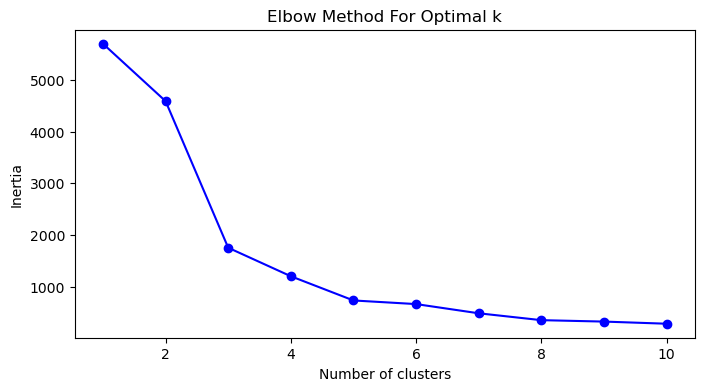

c:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Cluster
1    649
0    487
3      2
2      1
Name: count, dtype: int64

In [7]:
# Customer Segmentation using K-Means Clustering
from sklearn.cluster import KMeans

# Elbow method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with optimal k (let's assume k=4 for now, adjust after elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

rfm['Cluster'].value_counts()

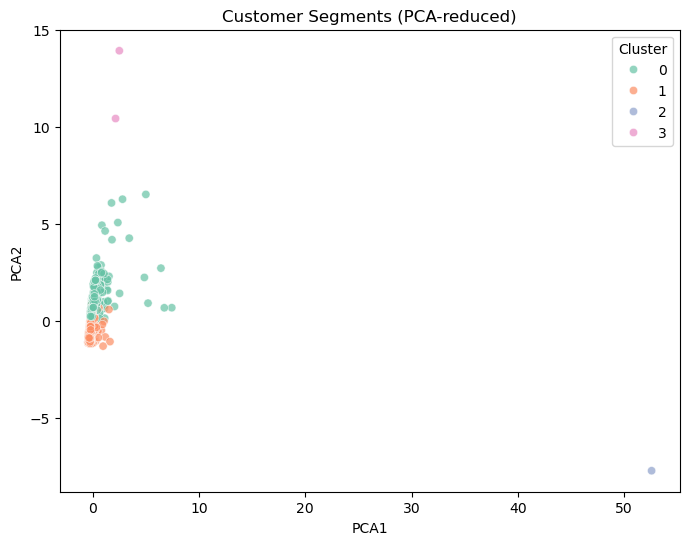

,Recency,Frequency,Monetary,AvgBasketSize,AvgOrderValue
Cluster,,,,,
0,9.045175,2.203285,1247.78076,26.514040,498.892938
1,41.365177,1.315871,439.45470,29.438747,330.118553
2,3.000000,1.000000,77183.60000,74215.000000,77183.600000
3,26.500000,36.500000,4996.66500,5.073574,138.284038


In [8]:
# Cluster Analysis & Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('Customer Segments (PCA-reduced)')
plt.show()

# Cluster profiling
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'AvgOrderValue']].mean()
cluster_profile

In [9]:
# Recommendation System: Recommend top products in each cluster to customers who haven't purchased them
top_n = 3  # Number of top products to recommend per cluster

# Find top products per cluster
recommendations = {}
for cluster in rfm['Cluster'].unique():
    cluster_customers = rfm[rfm['Cluster'] == cluster].index
    cluster_data = df[df['CustomerID'].isin(cluster_customers)]
    top_products = cluster_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(top_n).index.tolist()
    recommendations[cluster] = top_products

# Example: Recommend for a sample customer in each cluster
sample_recommendations = {}
for cluster in rfm['Cluster'].unique():
    customer = rfm[rfm['Cluster'] == cluster].index[0]
    customer_products = set(df[df['CustomerID'] == customer]['Description'])
    recs = [prod for prod in recommendations[cluster] if prod not in customer_products]
    sample_recommendations[customer] = recs

sample_recommendations

{12346.0: [],
 12347.0: ['WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'RED  HARMONICA IN BOX '],
 12356.0: ['WHITE HANGING HEART T-LIGHT HOLDER',
  'PACK OF 72 RETROSPOT CAKE CASES',
  'FAIRY CAKE FLANNEL ASSORTED COLOUR'],
 12748.0: ['WHITE METAL LANTERN']}

## Project Complete: Summary & Next Steps

- Data loaded, cleaned, and preprocessed
- RFM features engineered for customer-centric analysis
- Features scaled and reduced with PCA
- Customers segmented using K-Means clustering
- Clusters visualized and profiled
- Recommendation system implemented for each segment

**Next Steps:**
- Tune the number of clusters (k) based on the elbow plot
- Further analyze and interpret each cluster for business insights
- Deploy or present recommendations to stakeholders

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

# Data Retrival and observation

# Data preprocessing

### Cleaned Data Summary